* **Courses:** Fall 2022-IE 532-Analysis of Network Data-Section AN
* **Topic:** Homework_1
* **Student name:**  Chen Wang
* **collaborators:** Jo-Ting Wang/Jasmine Chao

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import *
from itertools import combinations
import heapq as hq
from random import sample
import pandas as pd
import math
import csv


plt.rcParams['figure.figsize'] = [8, 8] ## set the size of all figures

# Question 1_a
![1.a_1](Figures/1.a_1.png)

In [3]:
m_schedule = Model("question_1.a")

# Create variables
x1 = m_schedule.addVar(lb=0.0, name="9am-1pm")
x2 = m_schedule.addVar(lb=0.0, name="9am-11am")
x3 = m_schedule.addVar(lb=0.0, name="noon-3pm")
x4 = m_schedule.addVar(lb=0.0, name="noon-5pm")
x5 = m_schedule.addVar(lb=0.0, name="2pm-5pm")
x6 = m_schedule.addVar(lb=0.0, name="1pm-4pm")
x7 = m_schedule.addVar(lb=0.0, name="4pm-5pm")


obj = 30*x1 + 18*x2 + 21*x3 + 38*x4 + 20*x5 + 22*x6 + 9*x7
m_schedule.setObjective(obj)

m_schedule.addConstr(x1 + x2                          >= 1, "9am")
m_schedule.addConstr(x1 + x2                          >= 1, "10am")
m_schedule.addConstr(x1 + x2                          >= 1, "11am")
m_schedule.addConstr(x1                               >= 1, "noon")
m_schedule.addConstr(x1 +      x3 + x4                >= 1, "1pm")
m_schedule.addConstr(          x3 + x4      + x6      >= 1, "2am")
m_schedule.addConstr(          x3 + x4 + x5 + x6      >= 1, "3am")
m_schedule.addConstr(               x4 + x5 + x6      >= 1, "4am")
m_schedule.addConstr(               x4 + x5      + x7 >= 1, "5am")

m_schedule.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-20
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 9 rows, 7 columns and 23 nonzeros
Model fingerprint: 0x0597cd5e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e+00, 4e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 2 columns
Presolve time: 0.01s
Presolved: 4 rows, 5 columns, 13 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000000e+01   4.000000e+00   0.000000e+00      0s
       3    6.1000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds (0.00 work units)
Optimal objective  6.100000000e+01


In [3]:
for v in m_schedule.getVars():
    print('%s: %g' % (v.varName, v.x))

print('The minimum cost is : %g' % obj.getValue())

9am-1pm: 1
9am-11am: 0
noon-3pm: 0
noon-5pm: 0
2pm-5pm: 0
1pm-4pm: 1
4pm-5pm: 1
The minimum cost is : 61


# Question 1_b

# Method 1: nx.shortest_path

In [52]:
## Define the edges and their weights. Because the duration belongs to the nodes, instead of the edges, 
## I must transfer the duration to the weight inside the edges first.
## I create a duplicate mimic node to storage the duration. For example, the node1 will do a mitosis:
## creating two nodes: node1 and node2. node1 will inherit the original node1 and connect to node2
## the edges of node1 to node2 will create a weight that is the same as the node's duration.
G=nx.DiGraph()
G.add_edge(0,  1, weight= 0)
G.add_edge(1,  2, weight= 8)
G.add_edge(2,  3, weight= 0)
G.add_edge(2,  5, weight= 0)
G.add_edge(3,  4, weight= 4)
G.add_edge(4,  7, weight= 0)
G.add_edge(4,  9, weight= 0)
G.add_edge(5,  6, weight= 3)
G.add_edge(6, 11, weight= 0)
G.add_edge(7,  8, weight=10)
G.add_edge(8, 13, weight= 0)
G.add_edge(9, 10, weight= 5)
G.add_edge(10,13, weight= 0)
G.add_edge(11,12, weight= 4)
G.add_edge(12,13, weight= 0)
G.add_edge(13,14, weight= 3)
G.add_edge(14,15, weight= 0)

In [53]:
## Check purposes only.
for (i,j,d) in G.edges(data=True): 
    print(i,j,d)

0 1 {'weight': 0}
1 2 {'weight': 8}
2 3 {'weight': 0}
2 5 {'weight': 0}
3 4 {'weight': 4}
5 6 {'weight': 3}
4 7 {'weight': 0}
4 9 {'weight': 0}
7 8 {'weight': 10}
9 10 {'weight': 5}
6 11 {'weight': 0}
11 12 {'weight': 4}
8 13 {'weight': 0}
13 14 {'weight': 3}
10 13 {'weight': 0}
12 13 {'weight': 0}
14 15 {'weight': 0}


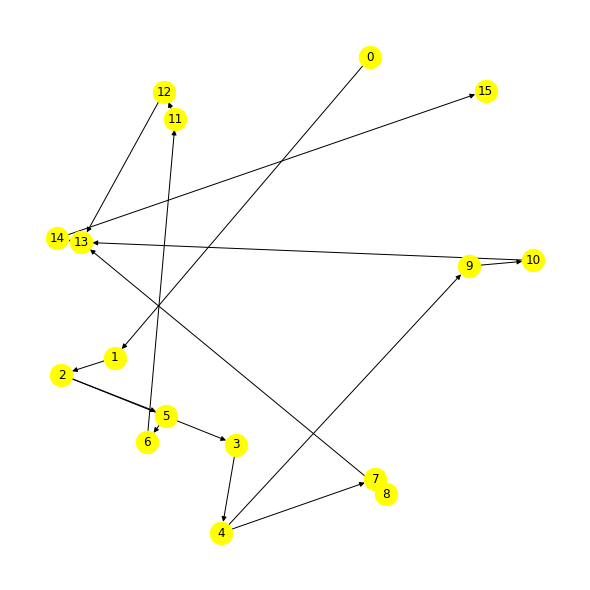

In [54]:
## We can also plot the network.
nx.draw(G, with_labels=True, node_size=500, node_color='yellow')

In [55]:
source= 0
terminal=15

## Get the answer use the function to compute the data.
print(nx.shortest_path(G, source, terminal, weight='weight')) # get the answer directly
print(nx.shortest_path_length(G, source, terminal, weight='weight'))

[0, 1, 2, 5, 6, 11, 12, 13, 14, 15]
18


# Method 2: LP_1
![1.b_1](Figures/1.b_1.png)

In [56]:
## Compared to the previous one, I do not need to do mitosis. Because the duration don't belong to 
## specific one node, I can put duration into edge as a weight.
## I Use nx.DiGraph() instead of nx.Graph() to create a diercted graph
H=nx.DiGraph()
H.add_edge(0,  1)
H.add_edge(1,  2)
H.add_edge(1,  3)
H.add_edge(2,  4)
H.add_edge(2,  5)
H.add_edge(4,  7)
H.add_edge(5,  7)
H.add_edge(3,  4)
H.add_edge(3,  6)
H.add_edge(6,  7)
H.add_edge(7,  8)

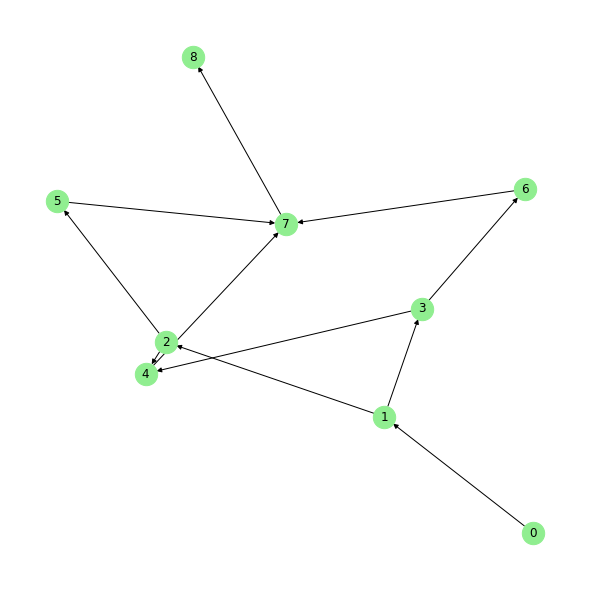

In [57]:
## We can also plot the graph.
nx.draw(H, with_labels=True, node_size=500, node_color='lightgreen')

In [70]:
model_2=Model("question1.b_LP")

In [71]:
## define variables at each edges: x[i,j]
x={}
for (i,j) in H.edges():
    x[i,j]=model_2.addVar(vtype=GRB.BINARY, name='x('+str(i)+','+str(j)+')') 

In [72]:
## Define source, terminal, weight
source = 0
terminal = 8
weight = [0,8,4,3,10,5,4,3,0]

## Define a input and output flow at edge node
inc={}
out={}
for i in H.nodes():
    inc[i]=0 ## define the start value is 0
    out[i]=0 ## define the end value is 0
    
for (i,j) in H.edges():
    inc[j]+=x[i,j] ## the output flow of the previous nodes combination is the input flow of the node
    out[i]+=x[i,j] ## the output flow of the node 
    

    
for i in H.nodes(): 
    if i==source:
        model_2.addConstr(out[i]-inc[i]==1) ## the source node has a flow equals to 1 (only an input flow)
    elif i==terminal:
        model_2.addConstr(out[i]-inc[i]==-1) ## the terminal node has a flow equals to -1 (only an output flow)
    else:
        model_2.addConstr(out[i]-inc[i]==0) ## all nodes in the middle will have a balanced flow = 0

In [73]:
obj_2 = 0
for i in range(len(inc)):
    obj_2 += (weight[i])*inc[i] ## Create a minimum function that equals to the input of 
                              ## the node multipy by the weight of this node

model_2.setObjective(obj_2, GRB.MINIMIZE)

In [74]:
model_2.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 9 rows, 11 columns and 22 nonzeros
Model fingerprint: 0xdc256c80
Variable types: 0 continuous, 11 integer (11 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 24.0000000
Presolve removed 9 rows and 11 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 18 24 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.800000000000e+01, best bound 1.800000000000e+01, gap 0.0000%


In [75]:
for (i,j,d) in H.edges(data=True):
    if x[i,j].X==1:
        print("(%s,%s): %2.1f"% (i,j, weight[j]))
        
print("The minimum cost is: {}".format(obj_2.getValue()))

(0,1): 8.0
(1,3): 3.0
(3,6): 4.0
(7,8): 0.0
(6,7): 3.0
The minimum cost is: 18.0


# Method 3: dual
![1.b_2](Figures/1.b_2.png)
![1.b_3](Figures/1.b_3.png)

In [16]:
## Create a dual model
model_dual=Model("question1.b_Dual")

In [17]:
## create 7 + 2(node0 and node8) variables
y={}
for j in range(9):
    y[j]=model_dual.addVar(vtype=GRB.CONTINUOUS, name='y('+str(j)+')') 

In [18]:
weight = [0,8,4,3,10,5,4,3,0]

## Create contraints that the gap of two nodes that has an edge(y[i], y[i], y[i]-y[j]) 
## is less or equal to the cj
for (i,j) in H.edges():
    model_dual.addConstr(y[i]-y[j]<=weight[j], name='x('+str(i)+str(j)+')' )

In [19]:
obj_dual = y[0] - y[8] ## only the source and the terminal are not balanced; others will equal to 0.
model_dual.setObjective(obj_dual, GRB.MAXIMIZE)

model_dual.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 11 rows, 9 columns and 22 nonzeros
Model fingerprint: 0x3049529e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 1e+01]
Presolve removed 7 rows and 5 columns
Presolve time: 0.00s
Presolved: 4 rows, 4 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+30   2.000000e+30   2.000000e+00      0s
       2    1.8000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.800000000e+01


In [20]:
for j in range(len(y)):
    print("(%s): %2.1f"% (j, y[j].X))
        
print("The minimum cost is: {}".format(obj_dual.getValue()))

(0): 18.0
(1): 10.0
(2): 8.0
(3): 7.0
(4): 3.0
(5): 3.0
(6): 3.0
(7): 0.0
(8): 0.0
The minimum cost is: 18.0


# Question 2_a
## Statement1:
![Answer of statement 1](Figures/2.a_statement_1.png)
## Statement2:
![Answer of statement 2](Figures/2.a_statement_2.png)

## Statement3:

Let me create a gurobi example to prove **it will be wrong.**

### if k = 0
The result shows the basic result.

In [21]:
m = Model('LP Example_cij_move_k')
x1 = m.addVar(name="x1")
x2 = m.addVar(name="x2")
k=0
m.setObjective((7-k)*x1 + (5-k)*x2 , GRB.MAXIMIZE)
m.addConstr(x1 + 2*x2  <= 6, "c1")
m.addConstr(4*x1 + 3*x2 <= 12, "c2")
m.addConstr(x1  >= 0, "c3")
m.addConstr(x2  >= 0, "c4")
m.optimize()

print('Optimizer:')
for v in m.getVars():
    print(v.varName, v.x)
    
print('Optimum Value:',  m.objVal)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x822421a2
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [5e+00, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 1e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2000000e+01   5.996000e+00   0.000000e+00      0s
       3    2.1000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.100000000e+01
Optimizer:
x1 3.0
x2 0.0
Optimum Value: 21.0


At this moment, x1, x2 will be equal to 3, 0, and the maximize will have a movement of -kx from its original

### If k = 5

In [22]:
m = Model('LP Example_cij_move_k')
x1 = m.addVar(name="x1")
x2 = m.addVar(name="x2")
k=5
m.setObjective((7-k)*x1 + (5-k)*x2 , GRB.MAXIMIZE)
m.addConstr(x1 + 2*x2  <= 6, "c1")
m.addConstr(4*x1 + 3*x2 <= 12, "c2")
m.addConstr(x1  >= 0, "c3")
m.addConstr(x2  >= 0, "c4")
m.optimize()

print('Optimizer:')
for v in m.getVars():
    print(v.varName, v.x)
    
print('Optimum Value:',  m.objVal)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xdd7ea351
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 1e+01]
Presolve removed 4 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.000000000e+00
Optimizer:
x1 3.0
x2 0.0
Optimum Value: 6.0


when k = 5, x1, x2 keep at the same value.

### If k >ci: (counterexample) , using k = 20 as an example
The relative xi will only has a solution xi = 0. Therefore, the solution will change directly

In [23]:
m = Model('LP Example')
x1 = m.addVar(name="x1")
x2 = m.addVar(name="x2")
k=20
m.setObjective((7-k)*x1 + (5-k)*x2 , GRB.MAXIMIZE)
m.addConstr(x1 + 2*x2  <= 6, "c1")
m.addConstr(4*x1 + 3*x2 <= 12, "c2")
m.addConstr(x1  >= 0, "c3")
m.addConstr(x2  >= 0, "c4")
m.optimize()

print('Optimizer:')
for v in m.getVars():
    print(v.varName, v.x)
    
print('Optimum Value:',  m.objVal)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xaa9b8eba
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 1e+01]
Presolve removed 4 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective -0.000000000e+00
Optimizer:
x1 0.0
x2 0.0
Optimum Value: -0.0


## Statement3:
![Answer of statement 3](Figures/2.a_statement_3.png)
## Statement4:
![Answer of statement 4](Figures/2.a_statement_4.png)

### If k = 1
The result shows the basic result.

In [24]:
m = Model('LP Example')
x1 = m.addVar(name="x1")
x2 = m.addVar(name="x2")
k=1
m.setObjective((7/k)*x1 + (5/k)*x2 , GRB.MAXIMIZE)
m.addConstr(x1 + 2*x2  <= 6, "c1")
m.addConstr(4*x1 + 3*x2 <= 12, "c2")
m.addConstr(x1  >= 0, "c3")
m.addConstr(x2  >= 0, "c4")
m.optimize()

print('Optimizer:')
for v in m.getVars():
    print(v.varName, v.x)
    
print('Optimum Value:',  m.objVal)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x822421a2
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [5e+00, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 1e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2000000e+01   5.996000e+00   0.000000e+00      0s
       3    2.1000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.100000000e+01
Optimizer:
x1 3.0
x2 0.0
Optimum Value: 21.0


At this moment, x1, x2 will be equal to 3, 0, and the maximize will have multiply with k

### If k = 0.0000001

In [25]:
m = Model('LP Example')
x1 = m.addVar(name="x1")
x2 = m.addVar(name="x2")
k=0.0000001
m.setObjective((7/k)*x1 + (5/k)*x2 , GRB.MAXIMIZE)
m.addConstr(x1 + 2*x2  <= 6, "c1")
m.addConstr(4*x1 + 3*x2 <= 12, "c2")
m.addConstr(x1  >= 0, "c3")
m.addConstr(x2  >= 0, "c4")
m.optimize()

print('Optimizer:')
for v in m.getVars():
    print(v.varName, v.x)
    
print('Optimum Value:',  m.objVal)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xfbc61349
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [5e+07, 7e+07]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 1e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2000000e+08   5.996000e+00   0.000000e+00      0s
       3    2.1000000e+08   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.100000000e+08
Optimizer:
x1 3.0
x2 0.0
Optimum Value: 210000000.0


### if k = 1000

In [26]:
m = Model('LP Example')
x1 = m.addVar(name="x1")
x2 = m.addVar(name="x2")
k=1000
m.setObjective((7/k)*x1 + (5/k)*x2 , GRB.MAXIMIZE)
m.addConstr(x1 + 2*x2  <= 6, "c1")
m.addConstr(4*x1 + 3*x2 <= 12, "c2")
m.addConstr(x1  >= 0, "c3")
m.addConstr(x2  >= 0, "c4")
m.optimize()

print('Optimizer:')
for v in m.getVars():
    print(v.varName, v.x)
    
print('Optimum Value:',  m.objVal)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x2470f747
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [5e-03, 7e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 1e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2000000e-02   5.996000e+00   0.000000e+00      0s
       3    2.1000000e-02   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.100000000e-02
Optimizer:
x1 3.0
x2 0.0
Optimum Value: 0.021


# Question 2_b

In [27]:
G = nx.DiGraph()
G.add_edge(1,  2, weight = 2 )
G.add_edge(1,  3, weight = 3 )
G.add_edge(2,  3, weight = 4 )
G.add_edge(2,  4, weight = 5 )
G.add_edge(2,  5, weight = 2 )
G.add_edge(3,  4, weight = 3 )
G.add_edge(3,  5, weight = 10 )
G.add_edge(5,  4, weight = 8 )
G.add_edge(4,  6, weight = 6 )
G.add_edge(5,  6, weight = 11 )

# I copy G as a backup graph for the final cost calculation
H = nx.DiGraph() # Create a new one
H.add_nodes_from(G) # copy over all the nodes
H.add_weighted_edges_from([(i,j,d["weight"]) for i,j,d in G.edges(data = True) ]) # copy over all the edges

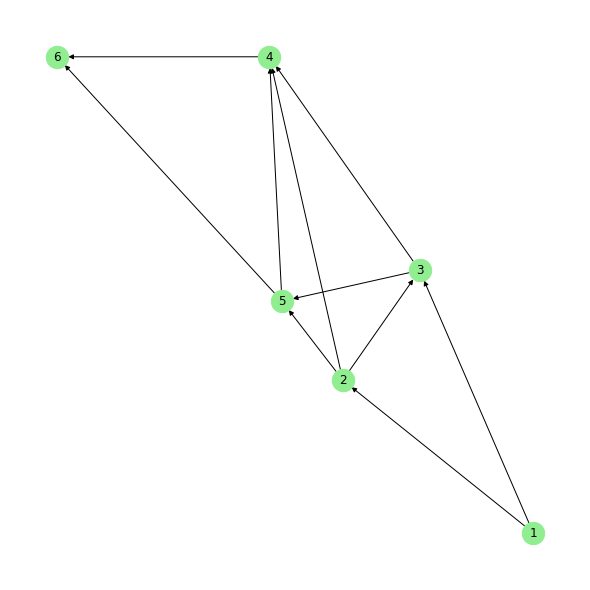

In [28]:
## We can also plot the network.
nx.draw(G, with_labels=True, node_size=500, node_color='lightgreen')

In [29]:
source= 1
terminal=6

## Get the shortest path from Dijkstra’s algorithms
shortest1 = nx.shortest_path(G, source, terminal, weight='weight')
shortest1

[1, 3, 4, 6]

In [30]:
## compute Suurballe algorithm, and return new G graph
def Suurballe_algorithm(R):
    for i,j,d in R.edges(data= True):
        for k in range(len(shortest1)-1):
            if (i == shortest1[k]) and (j == shortest1[k+1]):
                d["weight2"] = 0
            else:
                dsi = nx.shortest_path_length(R, source, i, weight='weight')
                dsj = nx.shortest_path_length(R, source, j, weight='weight')
                d["weight2"] = d["weight"] + dsi - dsj

    for i,j,d in R.edges(data= True):
        d['weight'] = d["weight2"]
        del d["weight2"]

    for k in range(len(shortest1)-1):
                R.remove_edge(shortest1[k],shortest1[k+1]) 

    return R
    
Suurballe_algorithm(G) 

[1, 2, 5, 6]

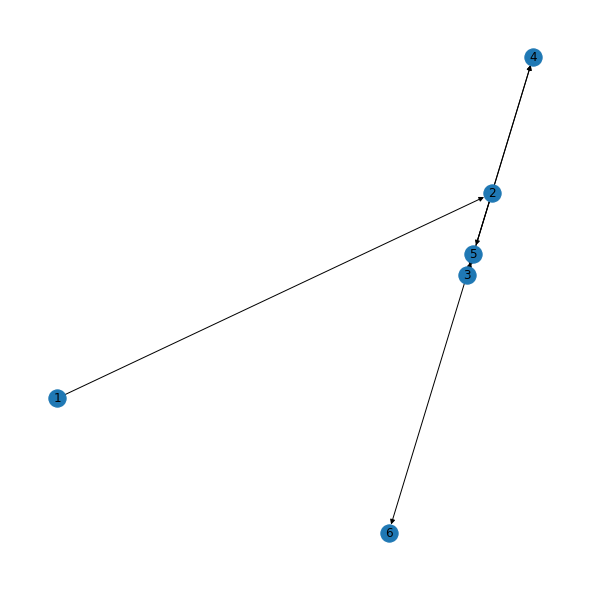

In [31]:
## Plot the newly graph of adjusted graph and compute the second shortest path
nx.draw(G, with_labels=True)

## The second shortest path
shortest2 = nx.shortest_path(G, source, terminal, weight='weight')
shortest2

In [32]:
## Delete duplicated nodes, combining all using edges to a list 
def find_overall_path(shortest1, shortest2):
    path = []
    path_1 = []
    path_2 = []
    for k in range(len(shortest1)-1):
        edges = (shortest1[k], shortest1[k+1])
        path_1.append(edges)
        path.append(edges)

    for l in range(len(shortest2)-1):
        edges = (shortest2[l], shortest2[l+1])
        path_2.append(edges)
        path.append(edges)

    for path1 in path_1:
        for path2 in path_2:
            if (path1[0] == path2[1]) and (path1[1] == path2[0]):
                path.remove(path1)
                path.remove(path2)
    return path 

overall_path = find_overall_path(shortest1, shortest2)
overall_path

[(1, 3), (3, 4), (4, 6), (1, 2), (2, 5), (5, 6)]

In [33]:
## Find the two disjointed path from the defined source to the terminal
def final_path_separation(path):
    final_path = {"path1":[], "path2":[]}
    for i in sorted(path):
        if len(final_path["path1"])==0:
            final_path["path1"].append(i)

        else:
            check = False
            for j in final_path["path1"]:
                if i[0] == j[1]:
                    check = True

            if check:
                final_path["path1"].append(i)
            else:
                if j not in final_path["path2"]:
                    final_path["path2"].append(i)
    return final_path

final_result = final_path_separation(overall_path) 
final_result

{'path1': [(1, 2), (2, 5), (5, 6)], 'path2': [(1, 3), (3, 4), (4, 6)]}

In [34]:
## Computed the cost of the shortest and the second shortest path
def cost(H, final_path):
    cost = {"path1":0, "path2":0}
    for k in final_path["path1"]:
        for i,j,d in H.edges(data = True):
            if (i,j) == k:
                cost["path1"] += d["weight"]

    for k in final_path["path2"]:
        for i,j,d in H.edges(data = True):
            if (i,j) == k:
                cost["path2"] += d["weight"]
    return cost

final_cost = cost(H, final_result)
final_cost

{'path1': 15, 'path2': 12}

In [35]:
## Print out the result
def route_arrange(result, cost):
    min_cost = min(final_cost["path1"], final_cost["path2"])
    for i in final_cost:
        if final_cost[i] == min_cost:
            min_path = i
        else:
            second_path = i
    print("The shortest path is: {}".format(final_result[min_path]))
    print("The shortest cost is: {}".format(final_cost[min_path]))
    print("The second shortest path is: {}".format(final_result[second_path]))
    print("The second shortest cost is: {}".format(final_cost[second_path]))

route_arrange(final_result, final_cost)

The shortest path is: [(1, 3), (3, 4), (4, 6)]
The shortest cost is: 12
The second shortest path is: [(1, 2), (2, 5), (5, 6)]
The second shortest cost is: 15


# Question 3_a
![Answer 3.a](Figures/3.a_1.png)

# Question 3_b

All the below code I reference from the professor's code from the file: **hylogenetics.ipynb"**. I just revise a little bit.

In [36]:
G = nx.Graph()
with open('phylo.csv') as csvfile: 
    datareader = csv.reader(csvfile)
    for row in datareader:
        G.add_edge(row[0],row[1],weight=float(row[2]))

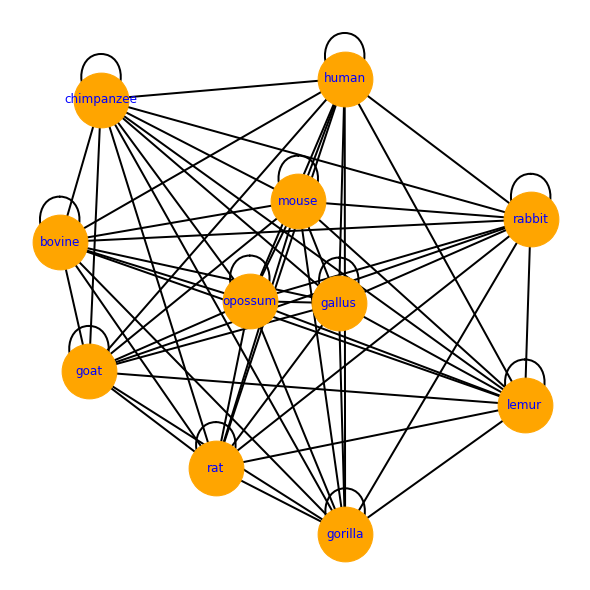

In [37]:
plt.figure(figsize=(8, 8))
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True, width=2, node_size=3000, node_color='orange', font_color="blue")

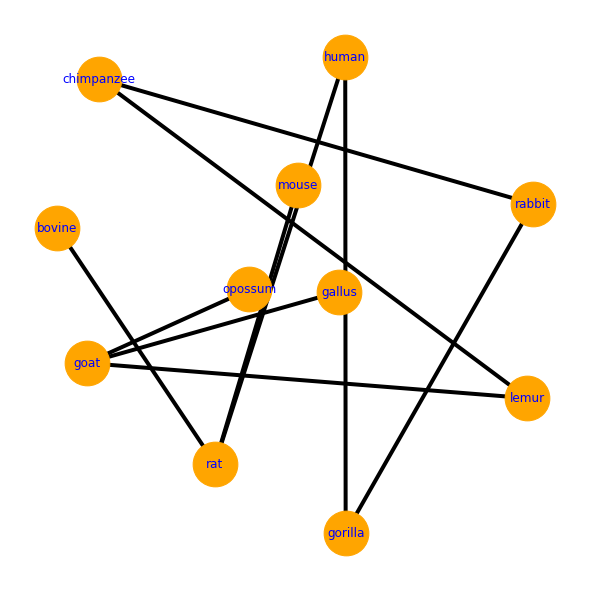

In [38]:
T=nx.minimum_spanning_tree(G) ## define the minimum spanning tree
plt.figure(figsize=(8, 8))
nx.draw(T,pos,with_labels=True,width=4, node_size=2000, node_color='orange', font_color="blue")

## Create a function to remove the largest weight of the minimum spanning trees
Copy from the professor's handout 

In [39]:
def get_MST_clusters(H, k):
    for i in range(k-1):
        removeEdge=max(dict(H.edges).items(), key=lambda x: x[1]['weight'])
        print("Remove edges: {}".format(removeEdge))
        H.remove_edge(removeEdge[0][0], removeEdge[0][1])
    return H

### When k = 2

Remove edges: (('goat', 'opossum'), {'weight': 0.1584})


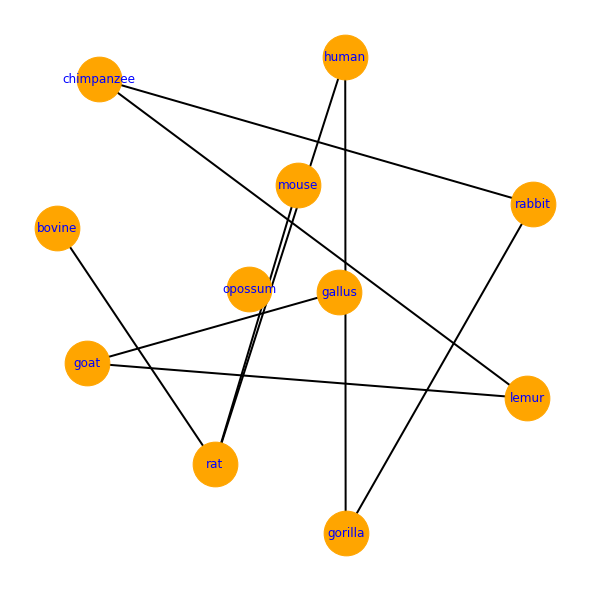

In [40]:
T=nx.minimum_spanning_tree(G)
k=2
T_2=get_MST_clusters(T,k)
plt.figure(figsize=(8, 8))
nx.draw(T_2,pos,with_labels=True,width=2, node_size=2000, node_color='orange', font_color="blue")

### When k = 3

Remove edges: (('goat', 'opossum'), {'weight': 0.1584})
Remove edges: (('goat', 'gallus'), {'weight': 0.1479})


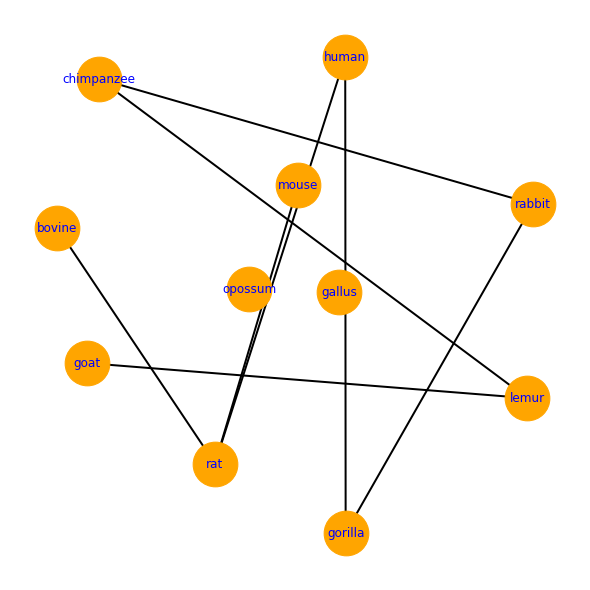

In [41]:
T=nx.minimum_spanning_tree(G)
k=3
T_3=get_MST_clusters(T,k)
plt.figure(figsize=(8, 8))
nx.draw(T_3,pos,with_labels=True,width=2, node_size=2000, node_color='orange', font_color="blue")

# Question 3_c

All the below code I reference from the professor's code from the file: **"Kou's heuristic.ipynb"** & **"spanning_trees.ipynb"**. I just revise a little bit.

In [42]:
df=pd.read_csv("illinois.csv")
df=df.dropna(how="any") # removes rows with missing data

In [43]:
def euclidean(x,y): # instead of the Haversine distance <- We should be using Haversine, this is simply a proxy
    return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

def haversine(x,y): # Code taken from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    lon1=x[0]
    lat1=x[1]
    lon2=y[0]
    lat2=y[1]
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2]) ## math.radians degree into radians
    ## map is the function that project one function and give it to the following result
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 3956 # This value does *not* affect the spanning tree calculations! 
    # It is the radius of the earth (needed for the Haversine calculation) in miles. It would be 6371 for kilometers. 
    return c*r

In [44]:
x=df["longitude"].tolist() # Longitude corresponds to the x axis.
y=df["latitude"].tolist() # Latitude corresponds to the y axis.
z=df["zip_code"].tolist() # getting all zip codes
# Getting them in list form ensures we can access them all at the same time with the same index.
# For example x[101], y[101], and z[101] would all return the 102nd zip code's longitude, latitude, and zip code value.
zipcodes={}
pos={}
for i in range(len(x)):
    zipcodes[z[i]]=(x[i],y[i]) # storing (x,y) information for each zip code
    pos[z[i]]=(x[i],y[i]) # also storing them to position the nodes in the end.
    # Fixing the position of the nodes in the graph makes for a more "realistic" plot of Illinois!
    # Unnecessary, but looks nice (when we plot).

G=nx.Graph() 
addList=[]
for (i,j) in combinations(zipcodes,2):
    distance=haversine(zipcodes[i],zipcodes[j])
    addList.append(distance)
    G.add_edge(i,j,weight=distance) # creating the graph one pair of zip codes at a time

In [45]:
def Steiner(G, terminal_nodes):
    tree=nx.Graph()
    
    ### First, check for extreme cases:
    ### 1. if there are no terminal nodes to connect, then return the empty graph.
    ### 2. If there is only one terminal node, then return a singleton node.
    ### In any other case, we go to the else statement!
    if len(terminal_nodes)==0:
        return tree
    elif len(terminal_nodes)==1:
        tree.add_node(terminal_nodes[0])
        return tree
    else:
        # Create a heap
        myHeap = []
        myPaths = {}
        for i in range(len(terminal_nodes) - 1):
            ### The next few lines print a statement -- useful to monitor progress in large networks.
            a=float(i)/float(len(terminal_nodes)-1)*100
            print("%.1f" % a+"% completed")
            n1 = terminal_nodes[i]
            for n2  in terminal_nodes[i+1:]: 
                # For each pair of nodes, we calculate the shortest path between the two.
                path = nx.bidirectional_dijkstra(G, n1, n2) # path is a tuple: the first element is the distance, the second the nodes it contains
                if path == False: # if the path is not there, something is wrong!
                    terminal_nodes.remove(n2) # To solve the issue, remove the second node, print an error message, and continue
                    continue # THIS SHOULD NEVER HAPPEN! It is simply here to catch a problem with the setup.
                nodelist=path[1]
                distance=path[0]
                # Get the pair we are considering
                pair=[n1,n2]
                # Sort it (so that all terminals are from lower to higher value)
                pair.sort()
                # And push the shortest path and its distance in the heap
                myPaths["%s%s", pair[0], pair[1]]=nodelist
                hq.heappush(myHeap, (distance, pair))
        # When we have all the shortest paths, check the heap and start taking them out, cheapest one first.
        while myHeap:
            myItem=hq.heappop(myHeap)
            # This appears convoluted, but it essentially states that we will add edges to the network, 
            # if i) it is not already there, and ii) it does not form a cycle. 
            if myItem[1][0] not in tree or myItem[1][1] not in tree or not nx.has_path(tree, myItem[1][0], myItem[1][1]):
                tree.add_edge(myItem[1][0], myItem[1][1], weight=myItem[0])
        subgraph=nx.Graph()
        # For all the tree edges, add them in a new subgraph
        for e in tree.edges(data=True):
            pair = [e[0],e[1]]
            pair.sort()
            newList = myPaths["%s%s", pair[0], pair[1]]
            for i in range(len(newList) - 1):
                subgraph.add_edge(newList[i], newList[i+1])
                
        # Return the subgraph's minimum spanning tree
        subgraph = nx.minimum_spanning_tree(subgraph)
        return subgraph

In [46]:
def visualization(G,k):
    import heapq as hq
    from random import sample
    print("k = {}".format(k))
    terminal_nodes=sample(list(G.nodes()), k) ## random give 6 numbers
    Steiner_tree=Steiner(G,terminal_nodes)
    
    
    pos=nx.spring_layout(G)
    nx.draw_networkx_edges(G,pos,edgelist=G.edges(), edge_color='k', width=1)
    nx.draw_networkx_edges(G,pos,edgelist=Steiner_tree.edges(), edge_color='r', width=5)
    nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=50)
    nx.draw_networkx_nodes(G,pos,nodelist=Steiner_tree.nodes(), node_color='b')
    nx.draw_networkx_nodes(G,pos,nodelist=terminal_nodes, node_color='r')

### when k = 5

k = 5
0.0% completed
25.0% completed
50.0% completed
75.0% completed


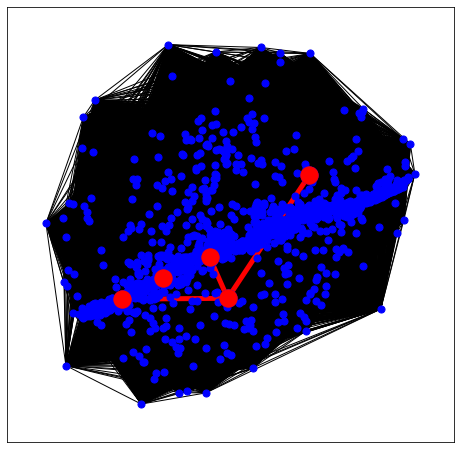

In [47]:
visualization(G,5)

### when k = 10

In [48]:
visualization(G,10)

k = 10
0.0% completed
11.1% completed
22.2% completed
33.3% completed
44.4% completed
55.6% completed
66.7% completed
77.8% completed
88.9% completed


KeyboardInterrupt: 

### when k = 15

In [ ]:
visualization(G,15)

# Question 4.a
![Answer 4.a](Figures/4.a.png)
# Question 4.b
![Answer 4.b](Figures/4.b.png)